In [3]:
# Week 2: Data Cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Week 2 Environment Ready!")

# Load your dataset (Titanic or your chosen dataset)
# If using Titanic from local file:
df = pd.read_csv(r'C:\Users\khadi\Datasets\titanic_large.csv')  # or your file path

# If downloading fresh:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

✅ Week 2 Environment Ready!
Dataset loaded successfully!
Dataset shape: (891, 12)


In [4]:
print("=== DATA ASSESSMENT (BEFORE CLEANING) ===")

print("\n1. Dataset Overview:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n2. First 10 rows:")
display(df.head(10))

print("\n3. Dataset Information:")
df.info()

print("\n4. Missing Values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

print("\n5. Duplicate Rows:")
print(f"Duplicate rows: {df.duplicated().sum()}")

print("\n6. Basic Statistics:")
display(df.describe())

=== DATA ASSESSMENT (BEFORE CLEANING) ===

1. Dataset Overview:
Rows: 891, Columns: 12

2. First 10 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C



3. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

4. Missing Values:
Age         177
Cabin       687
Embarked      2
dtype: int64

5. Duplicate Rows:
Duplicate rows: 0

6. Basic Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


=== VISUAL ASSESSMENT ===


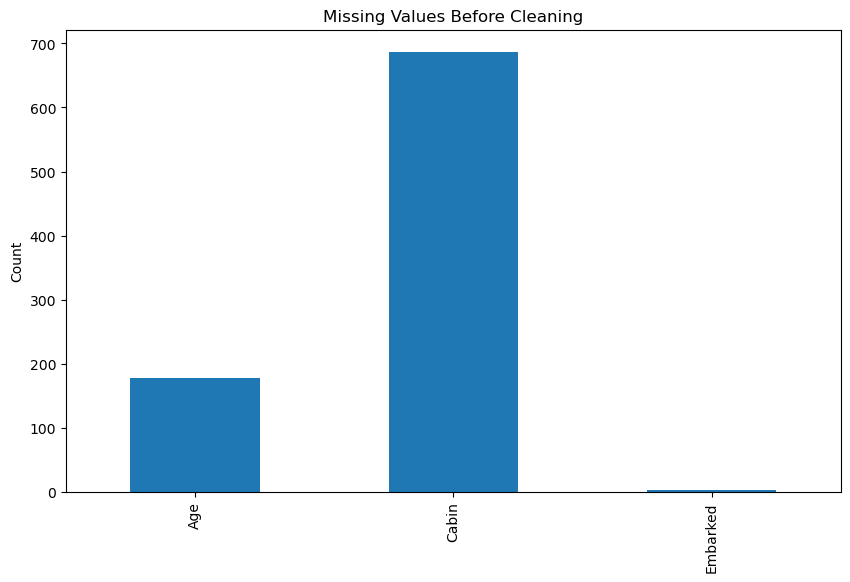

✅ Original dataset saved for comparison


In [5]:
import matplotlib.pyplot as plt

print("=== VISUAL ASSESSMENT ===")

# Plot missing values
plt.figure(figsize=(10, 6))
missing_count = df.isnull().sum()
missing_count[missing_count > 0].plot(kind='bar')
plt.title('Missing Values Before Cleaning')
plt.ylabel('Count')
plt.show()

# Save original dataset for comparison
df_before = df.copy()
print("✅ Original dataset saved for comparison")


In [6]:
print("=== HANDLING MISSING VALUES ===")

# Strategy 1: Remove columns with too many missing values
# If a column has more than 50% missing values, consider dropping
missing_percent = (df.isnull().sum() / len(df)) * 100
columns_to_drop = missing_percent[missing_percent > 50].index
print(f"Columns to consider dropping: {list(columns_to_drop)}")

# For Titanic dataset, Cabin has many missing values - we might drop it
if 'Cabin' in df.columns:
    df = df.drop('Cabin', axis=1)
    print("Dropped 'Cabin' column (too many missing values)")

# Strategy 2: Fill numerical missing values with median
numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Filled missing values in {col} with median: {df[col].median()}")

# Strategy 3: Fill categorical missing values with mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
        df[col].fillna(mode_value, inplace=True)
        print(f"Filled missing values in {col} with mode: {mode_value}")

print("Missing values after cleaning:")
print(df.isnull().sum())

=== HANDLING MISSING VALUES ===
Columns to consider dropping: ['Cabin']
Dropped 'Cabin' column (too many missing values)
Filled missing values in Age with median: 28.0
Filled missing values in Embarked with mode: S
Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\khadi\AppData\Local\Temp\ipykernel_3760\2773713218.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\khadi\AppData\Local\Temp\ipykernel_3760\2773713218.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [7]:
print("=== HANDLING DUPLICATES ===")

duplicates_before = df.duplicated().sum()
print(f"Duplicate rows before: {duplicates_before}")

# Remove duplicates
df = df.drop_duplicates()

duplicates_after = df.duplicated().sum()
print(f"Duplicate rows after: {duplicates_after}")
print(f"Removed {duplicates_before - duplicates_after} duplicate rows")

=== HANDLING DUPLICATES ===
Duplicate rows before: 0
Duplicate rows after: 0
Removed 0 duplicate rows


=== HANDLING OUTLIERS ===
Age: 66 outliers detected


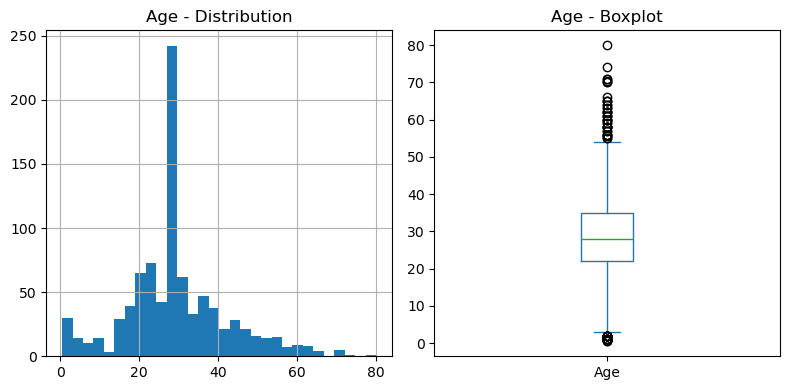

SibSp: 46 outliers detected


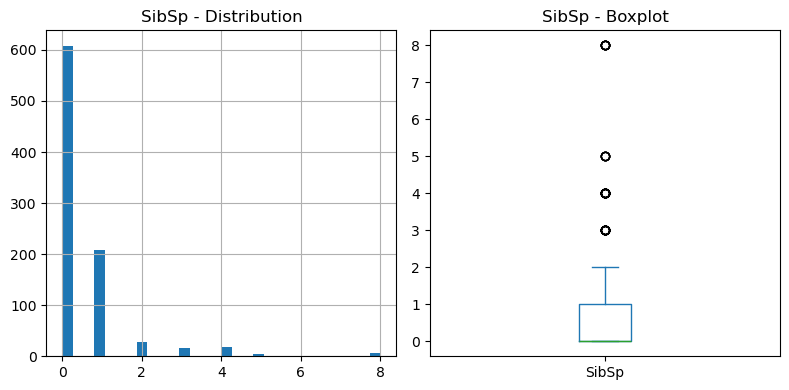

Parch: 213 outliers detected


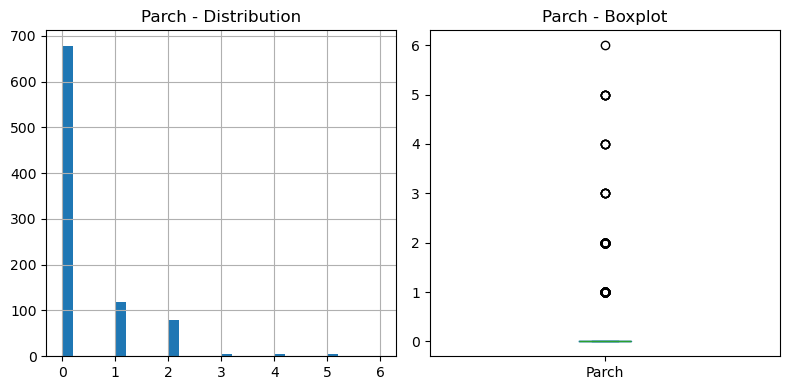

Fare: 116 outliers detected


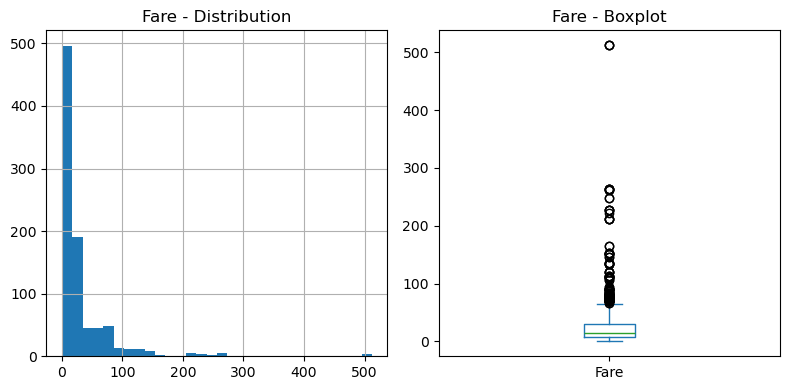

In [8]:
print("=== HANDLING OUTLIERS ===")

# Method 1: Identify outliers using IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Check numerical columns for outliers
numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    outliers = detect_outliers_iqr(df[col])
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers detected")
        
        # Visualize outliers
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        df[col].hist(bins=30)
        plt.title(f'{col} - Distribution')
        
        plt.subplot(1, 2, 2)
        df[col].plot(kind='box')
        plt.title(f'{col} - Boxplot')
        plt.tight_layout()
        plt.show()

In [9]:
print("=== DATA ASSESSMENT (AFTER CLEANING) ===")

print(f"Dataset shape after cleaning: {df.shape}")
print(f"Rows removed: {df_before.shape[0] - df.shape[0]}")
print(f"Columns removed: {df_before.shape[1] - df.shape[1]}")

print("\nMissing values after cleaning:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

# Save cleaned dataset
df_after = df.copy()
print("✅ Cleaned dataset saved")

=== DATA ASSESSMENT (AFTER CLEANING) ===
Dataset shape after cleaning: (891, 11)
Rows removed: 0
Columns removed: 1

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object
✅ Cleaned dataset saved


In [10]:
print("📊 WEEK 2 ASSIGNMENT: BEFORE vs AFTER CLEANING REPORT")
print("=" * 60)

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Metric': ['Total Rows', 'Total Columns', 'Missing Values', 'Duplicate Rows'],
    'Before Cleaning': [
        df_before.shape[0],
        df_before.shape[1],
        df_before.isnull().sum().sum(),
        df_before.duplicated().sum()
    ],
    'After Cleaning': [
        df_after.shape[0],
        df_after.shape[1],
        df_after.isnull().sum().sum(),
        df_after.duplicated().sum()
    ],
    'Improvement': [
        df_before.shape[0] - df_after.shape[0],
        df_before.shape[1] - df_after.shape[1],
        df_before.isnull().sum().sum() - df_after.isnull().sum().sum(),
        df_before.duplicated().sum() - df_after.duplicated().sum()
    ]
})

display(comparison)

print("\n🔍 KEY CLEANING ACTIONS PERFORMED:")
cleaning_actions = []

# Document what was done
if 'Cabin' in df_before.columns and 'Cabin' not in df_after.columns:
    cleaning_actions.append("Dropped 'Cabin' column (too many missing values)")

if df_before.duplicated().sum() > df_after.duplicated().sum():
    cleaning_actions.append(f"Removed {df_before.duplicated().sum() - df_after.duplicated().sum()} duplicate rows")

if df_before.isnull().sum().sum() > df_after.isnull().sum().sum():
    cleaning_actions.append(f"Handled {df_before.isnull().sum().sum() - df_after.isnull().sum().sum()} missing values")

for action in cleaning_actions:
    print(f"• {action}")

print(f"\n✅ DATA QUALITY IMPROVEMENT: {((df_before.isnull().sum().sum() - df_after.isnull().sum().sum()) / df_before.isnull().sum().sum() * 100):.1f}% reduction in missing values")

📊 WEEK 2 ASSIGNMENT: BEFORE vs AFTER CLEANING REPORT


,Metric,Before Cleaning,After Cleaning,Improvement
0,Total Rows,891,891,0
1,Total Columns,12,11,1
2,Missing Values,866,0,866
3,Duplicate Rows,0,0,0



🔍 KEY CLEANING ACTIONS PERFORMED:
• Dropped 'Cabin' column (too many missing values)
• Handled 866 missing values

✅ DATA QUALITY IMPROVEMENT: 100.0% reduction in missing values


In [11]:
# Save cleaned dataset to CSV
df_after.to_csv('titanic_cleaned.csv', index=False)

# Save the notebook
print("💾 Save this notebook as 'week2_data_cleaning.ipynb'")
print("📁 Upload to GitHub: week2_data_cleaning.ipynb + titanic_cleaned.csv")
print("🎯 Assignment 2 Complete!")

💾 Save this notebook as 'week2_data_cleaning.ipynb'
📁 Upload to GitHub: week2_data_cleaning.ipynb + titanic_cleaned.csv
🎯 Assignment 2 Complete!
